### 8中内置的浸润方法 https://blog.csdn.net/Ayue0616/article/details/131009335

In [411]:
setwd('/import/liujing/data2/')

In [412]:
library(openxlsx)
data<- read.xlsx("./res/CI-CTR/bulk/74-mRNA_FPKM.genename.xlsx", sheet = 1)
library(dplyr)

In [413]:
head(data,2)

,Gene_name,C10,C11,C12,C13,C14,C15,C16,C17,C18,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ZZZ3,9.694104,8.204165,9.569441,6.659882,5.449594,8.611691,6.886018,5.389103,5.336686,...,14.880933,8.037799,5.667441,11.80003,6.659176,5.785232,8.749977,11.03076,8.004704,10.07247
2,ZZEF1,18.515927,18.296195,19.053030,18.403302,19.992571,18.649972,19.680564,20.438019,19.539639,...,8.751292,17.115120,16.585566,16.60637,18.344102,21.665904,21.333761,20.21582,17.918223,13.92859


In [414]:
data = data[!duplicated(data$Gene_name),]

In [415]:
expr = data %>% tibble::remove_rownames() %>% tibble::column_to_rownames(.,'Gene_name') 
Group = c(rep('con',31),rep('CI',43))

In [416]:
library(IOBR)

In [417]:
head(expr,2)

,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ZZZ3,9.694104,8.204165,9.569441,6.659882,5.449594,8.611691,6.886018,5.389103,5.336686,7.70851,...,14.880933,8.037799,5.667441,11.80003,6.659176,5.785232,8.749977,11.03076,8.004704,10.07247
ZZEF1,18.515927,18.296195,19.053030,18.403302,19.992571,18.649972,19.680564,20.438019,19.539639,20.41526,...,8.751292,17.115120,16.585566,16.60637,18.344102,21.665904,21.333761,20.21582,17.918223,13.92859


In [418]:
expr_coad <- log2(expr+0.1)
expr_coad = expr
#expr_coad <- expr_coad[apply(expr_coad,1,sd)>0.5,]

In [419]:
tme_deconvolution_methods

MCPcounter               EPIC              xCell          CIBERSORT 
      "mcpcounter"             "epic"            "xcell"        "cibersort" 
CIBERSORT Absolute                IPS           ESTIMATE                SVR 
   "cibersort_abs"              "ips"         "estimate"              "svr" 
              lsei              TIMER          quanTIseq 
            "lsei"            "timer"        "quantiseq"

In [420]:
dim(expr_coad)

[1] 30983    74

In [661]:
im_ssgsea <- deconvo_tme(eset = expr_coad,
                        method = "cibersort",
                        arrays = F
                        )


>>> Running CIBERSORT



In [662]:
acp = im_ssgsea[2:dim(im_ssgsea)[2]]

In [663]:
acp = acp[,which(colSums(acp) > 0)]

In [664]:
cc = cbind(im_ssgsea$ID,acp)

In [665]:
colnames(cc)[1] = 'ID'

In [666]:
im_ssgsea = cc

In [667]:
library(dplyr)

In [668]:
# library(tidyverse)

# cellMarker <- read.csv("/import/liujing/data/cellmarker.txt", header = F, sep = "\t") # 用EXCEL打开删除NA列
# cellMarker <- cellMarker %>% column_to_rownames("V1") %>% t()

# a <- cellMarker
# a <- a[1:nrow(a), ]
# set <- colnames(a)
# geneSet <- list()
# # i <- "Activated CD8 T cell"
# for (i in set) {
#   x <-  as.character(a[,i])
#   x <- x[nchar(x)!=0]
#   x <-  as.character(x)
#   geneSet[[i]] <-x
# }

# im_ssgsea <- calculate_sig_score(eset = expr_coad, signature = geneSet , method = "ssgsea")

In [669]:
ssgeea = im_ssgsea

In [670]:
ssgeea = ssgeea %>%  tibble::column_to_rownames(.,'ID') %>% t() 

In [671]:
ssgeea = ssgeea[which(rowSums(ssgeea) > 0),]

In [672]:
im_ssgsea$group <- Group # CIBERSORT中的数据

In [673]:
head(im_ssgsea,2)

,ID,B_cells_naive_CIBERSORT,B_cells_memory_CIBERSORT,Plasma_cells_CIBERSORT,T_cells_CD8_CIBERSORT,T_cells_CD4_naive_CIBERSORT,T_cells_CD4_memory_resting_CIBERSORT,T_cells_CD4_memory_activated_CIBERSORT,T_cells_regulatory_(Tregs)_CIBERSORT,T_cells_gamma_delta_CIBERSORT,...,Macrophages_M0_CIBERSORT,Macrophages_M1_CIBERSORT,Macrophages_M2_CIBERSORT,Dendritic_cells_activated_CIBERSORT,Mast_cells_resting_CIBERSORT,Eosinophils_CIBERSORT,Neutrophils_CIBERSORT,Correlation_CIBERSORT,RMSE_CIBERSORT,group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,C10,0.0184552748,0,0.000000000,0.1555477,0.1075937,0.07354913,0.02066837,0.01598648,0,...,0,0,0,0.006854585,0.003319929,0,0.3355013,0.7393024,0.6901921,con
2,C11,0.0002202792,0,0.003778107,0.1195569,0.0575484,0.01656198,0.04863193,0.00353335,0,...,0,0,0,0.000000000,0.001022185,0,0.4649459,0.7916082,0.6217336,con


### 堆积图

In [674]:
library(tidyHeatmap)
library(tidyverse)
library(RColorBrewer)

In [675]:
im_ssgsea2 = im_ssgsea %>% dplyr::select(-group)   #%>%  tibble::column_to_rownames(.,'ID')

In [677]:
cibersort_long <- im_ssgsea2 %>% 
  select(Correlation_CIBERSORT, RMSE_CIBERSORT,ID,everything()) %>% 
  pivot_longer(- c(1:4),names_to = "cell_type",values_to = "fraction") %>% 
  dplyr::mutate(cell_type = gsub("_CIBERSORT","",cell_type),
                cell_type = gsub("_"," ",cell_type))

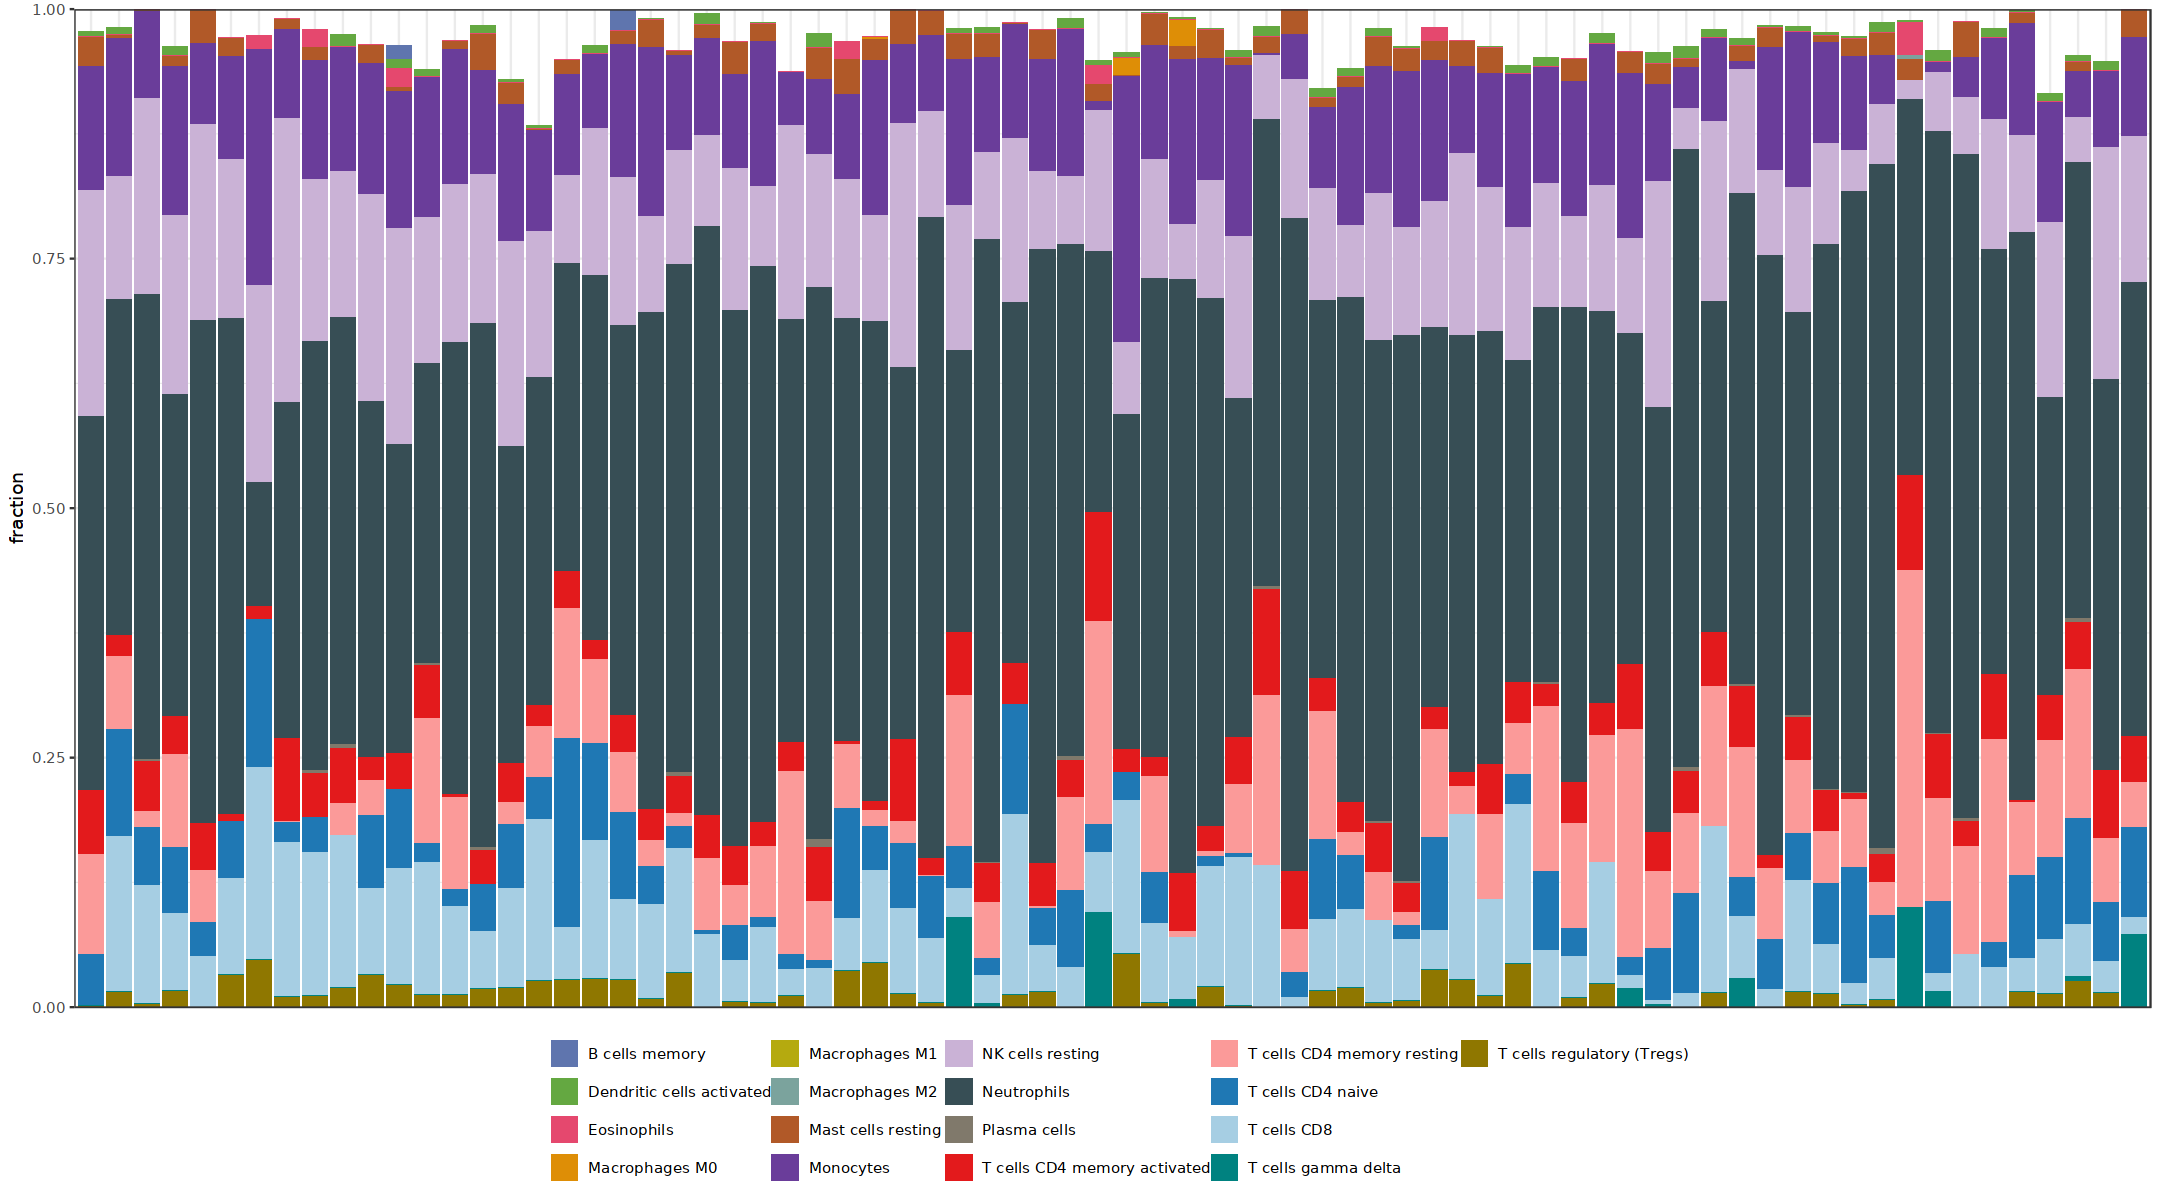

In [678]:
p1 <- cibersort_long %>% 
  ggplot(aes(ID,fraction))+
  geom_bar(stat = "identity",position = "stack",aes(fill=cell_type))+
  labs(x=NULL)+
  scale_y_continuous(expand = c(0,0))+
  scale_fill_manual(values = palette4,name=NULL)+ # iobr还给大家准备了几个色盘，贴心！
  theme_bw()+
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        legend.position = "bottom"
        )
p1

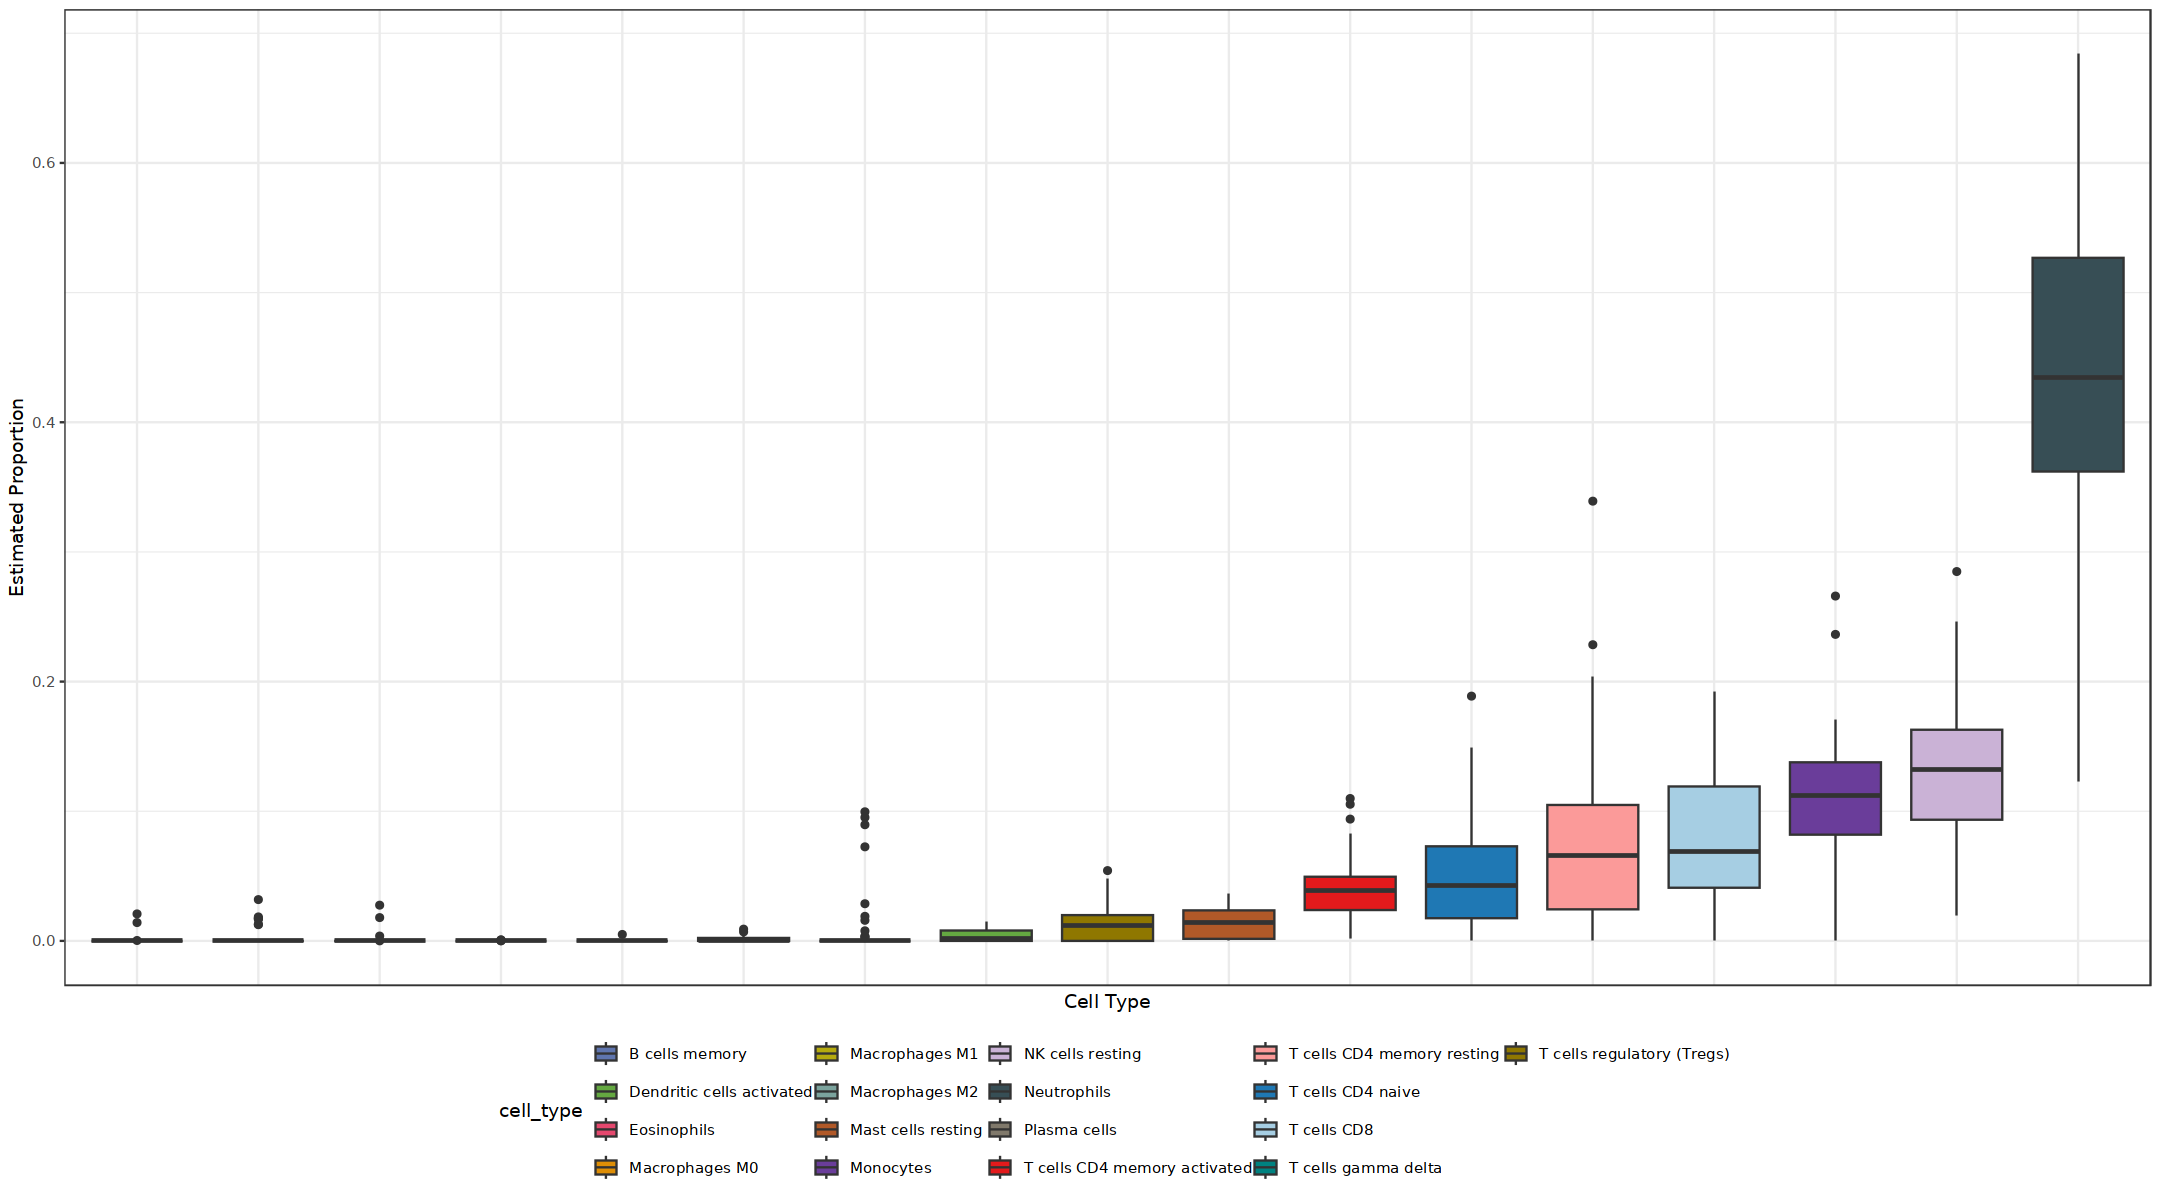

In [679]:
# 有顺序的箱线图
library(forcats)

p2 <- ggplot(cibersort_long,aes(fct_reorder(cell_type, fraction),fraction,fill = cell_type)) + 
  geom_boxplot() + 
  #geom_jitter(width = 0.2,aes(color=cell_type))+
  theme_bw() + 
  labs(x = "Cell Type", y = "Estimated Proportion") +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        legend.position = "bottom") + 
  scale_fill_manual(values = palette4)
p2


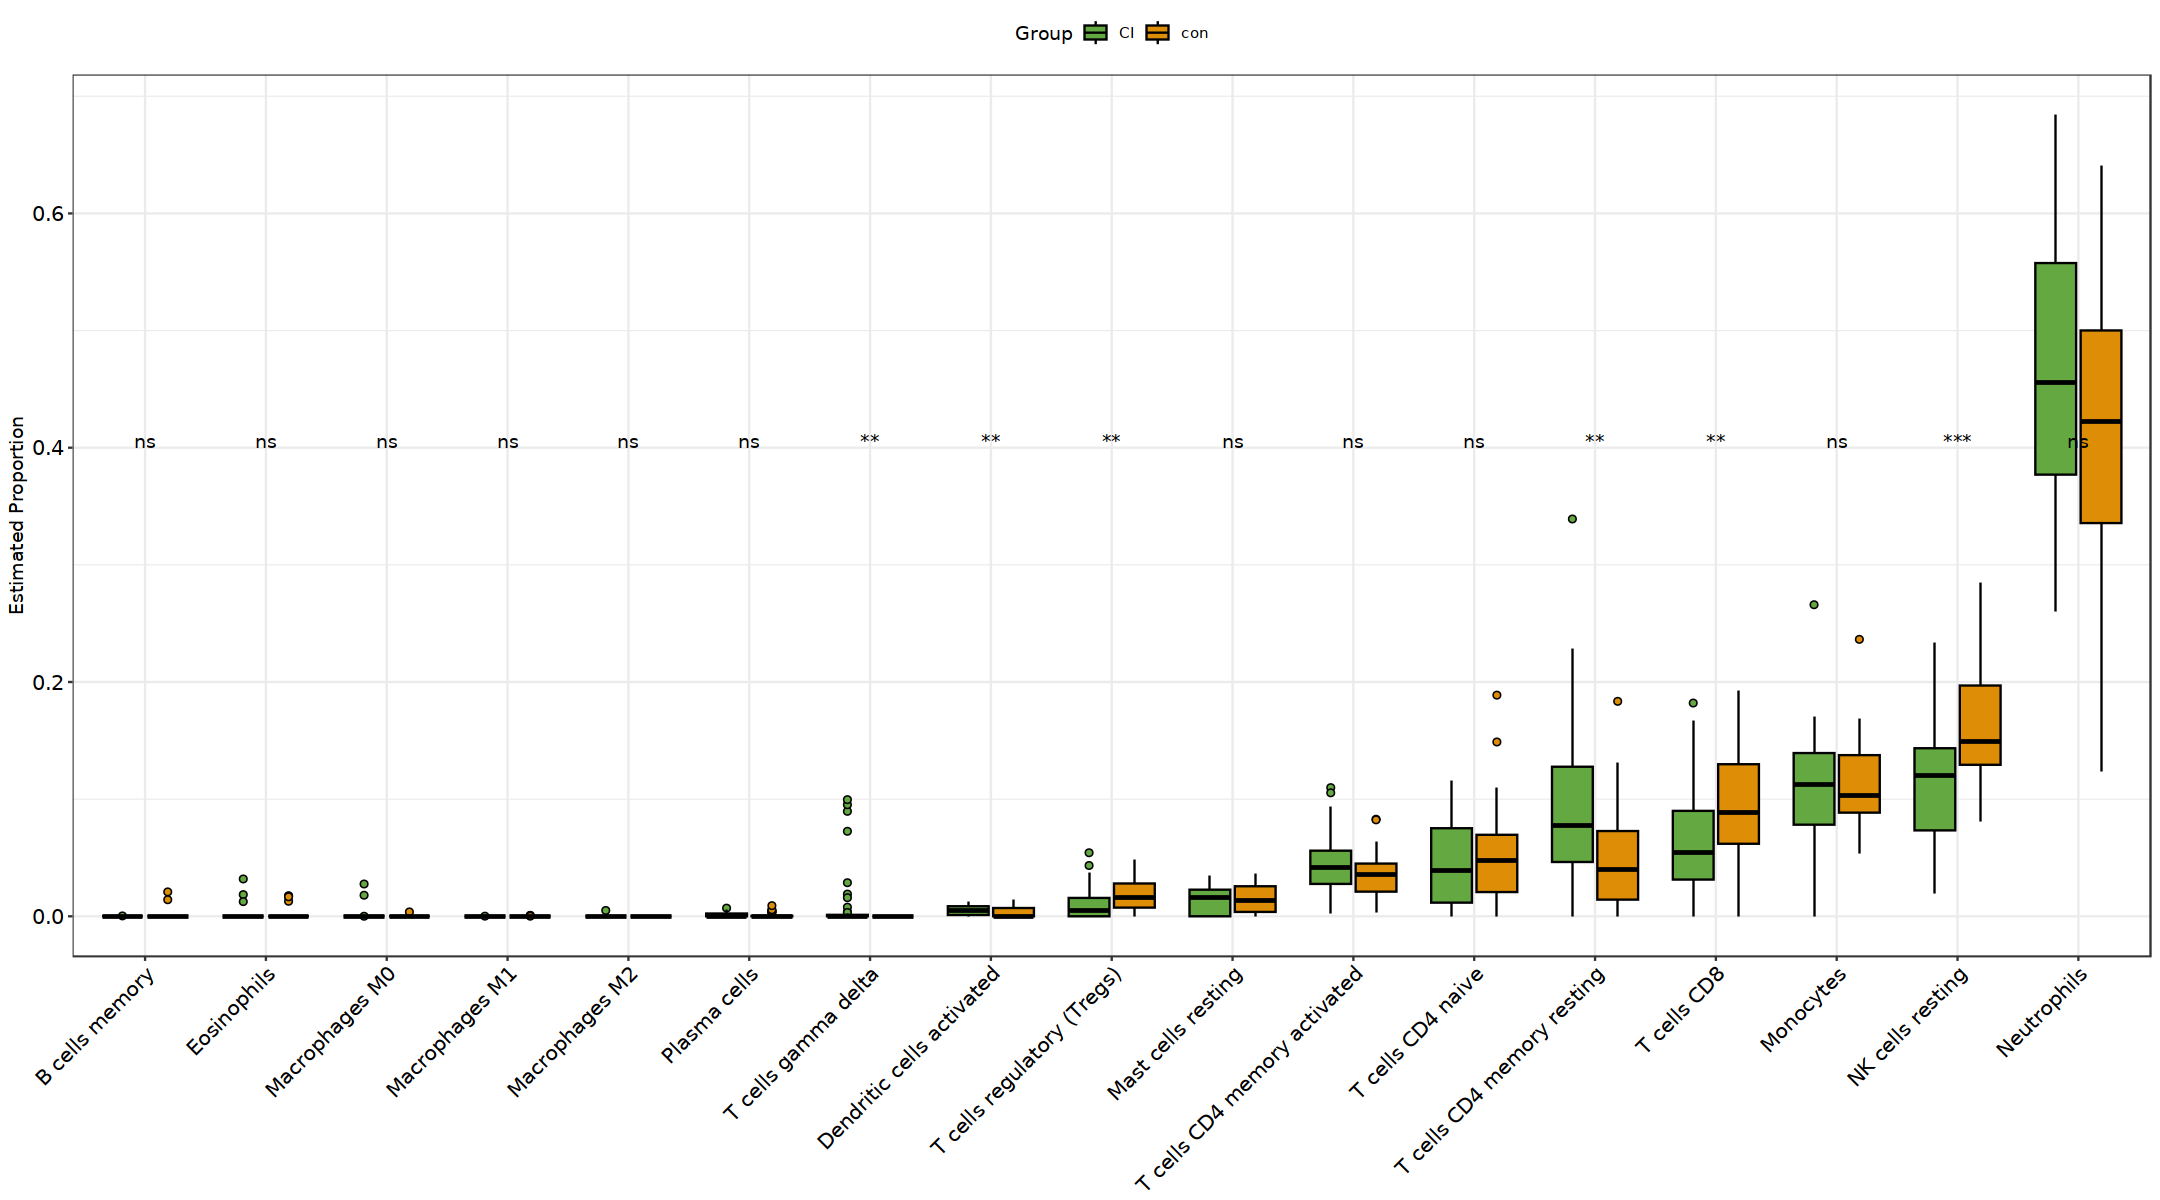

In [680]:
library(ggpubr)
library(stringr)

# 分组
cibersort_long$Group = ifelse(str_sub(cibersort_long$ID,1,2) == 'CI','CI','con')

p3 <- ggplot(cibersort_long,aes(fct_reorder(cell_type,fraction),fraction,fill = Group)) + 
  geom_boxplot(outlier.shape = 21,color = "black") + 
  scale_fill_manual(values = palette1[c(2,4)])+ 
  theme_bw() + 
  labs(x = NULL, y = "Estimated Proportion") +
  theme(legend.position = "top") + 
  theme(axis.text.x = element_text(angle=45,hjust = 1),
        axis.text = element_text(color = "black",size = 12))+
  stat_compare_means(aes(group = Group,label = ..p.signif..),
                     method = "kruskal.test",label.y = 0.4)
p3


In [681]:
library(tidyHeatmap)

p4 <- heatmap(.data = cibersort_long
        ,.row = cell_type
        ,.column = ID
        ,.value = fraction
        ,scale = "column"
        ,palette_value = circlize::colorRamp2(
            seq(-2, 2, length.out = 11), 
            RColorBrewer::brewer.pal(11, "RdBu")
        )
        ,show_column_names=F
        ,row_names_gp = gpar(fontsize = 10),
        column_names_gp = gpar(fontsize = 7),
        column_title_gp = gpar(fontsize = 7),
        row_title_gp = gpar(fontsize = 7)
        ) %>% 
  add_tile(Group) # 新版本已经改了，注意
p4

In [683]:
im_ssgsea3 = im_ssgsea[,1:19] %>%  tibble::column_to_rownames(.,'ID')

In [684]:
colnames(im_ssgsea3) = gsub('_CIBERSORT','',colnames(im_ssgsea3))

In [685]:
head(im_ssgsea3,2)

,B_cells_naive,B_cells_memory,Plasma_cells,T_cells_CD8,T_cells_CD4_naive,T_cells_CD4_memory_resting,T_cells_CD4_memory_activated,T_cells_regulatory_(Tregs),T_cells_gamma_delta,NK_cells_resting,Monocytes,Macrophages_M0,Macrophages_M1,Macrophages_M2,Dendritic_cells_activated,Mast_cells_resting,Eosinophils,Neutrophils
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C10,0.0184552748,0,0.000000000,0.1555477,0.1075937,0.07354913,0.02066837,0.01598648,0,0.1247511,0.13777233,0,0,0,0.006854585,0.003319929,0,0.3355013
C11,0.0002202792,0,0.003778107,0.1195569,0.0575484,0.01656198,0.04863193,0.00353335,0,0.1968771,0.08732389,0,0,0,0.000000000,0.001022185,0,0.4649459


In [686]:
data <- t(im_ssgsea3) 
col <- rainbow(nrow(data), s = 0.7, v = 0.7)  # 按变量数量设置颜色。s（saturation，饱和度）和v（value，明度）用于HSV颜色空间的描述。

In [687]:

 
## 绘制
pdf("barplot1.pdf", height = 10, width = 24)
# 图形属性设置
par(las = 1, mar = c(8,5,4,16),  # las用于定义轴标签的样式。mar用于设置图形的边距。
    mgp = c(3,0.1,0), cex.axis = 1.5)  # mgp用于设置轴标题、轴标签和轴线的边距线。cex.axis用于轴注释，相对于cex当前设置的放大倍率。
# 画条形图
a1 <- barplot(data, col = col,  # 设置颜色
              yaxt = "n", xaxt = "n",  # 不显示x、y坐标轴
              ylab = "Relative Percent",  # y轴标签
              cex.lab = 1.8)  # 标签文字大小
# 画坐标轴
a2 <- axis(side = 2, tick = FALSE, labels = FALSE)  # side用于指定要在绘图的哪一侧绘制轴。tick用于指定是否绘制刻度线和轴线。labels用于指定是否在刻度线处进行（数字）注释
axis(side = 2, a2, paste0(a2*100, "%"))  # side = 2指定在绘图的左侧绘制轴
axis(side = 1, a1, labels = FALSE)  # side = 1指定在绘图的下方绘制轴
# 添加坐标轴标签
par(srt = 60, xpd = TRUE)  # srt表示以度为单位的字符串旋转。xpd用于设置图形打印裁剪方式
text(x = a1, y = -0.02, labels = colnames(data), adj = 1, cex = 0.6)  # adj(adjustment)指定标签的x调整，0 表示左/下，1 表示右/上。cex(character expansion)，字体大小。
# 添加图例
par(srt = 0)  # srt表示graphics以度为单位的字符串旋转。
ytick2 <- cumsum(data[, ncol(data)])  # cumsum(Cumulative Sums，累计总和)，将data的最后一列累计总和。
ytick1 <- c(0, ytick2[-length(ytick2)])  # 将上述总和去掉最后一位，第一位前加0
legend(x = par("usr")[2]*0.98, y = par("usr")[4],
       legend = rownames(data),
       col = col, pch = 15, bty = "n", cex = 1.3)  # pch(point character)，点形状。bty(box type)，在图例周围绘制的框的类型。cex，字符扩展因子
dev.off()  # 关闭并保存图形

png 
  2

### gene和细胞相关性分析

In [688]:
library(linkET)

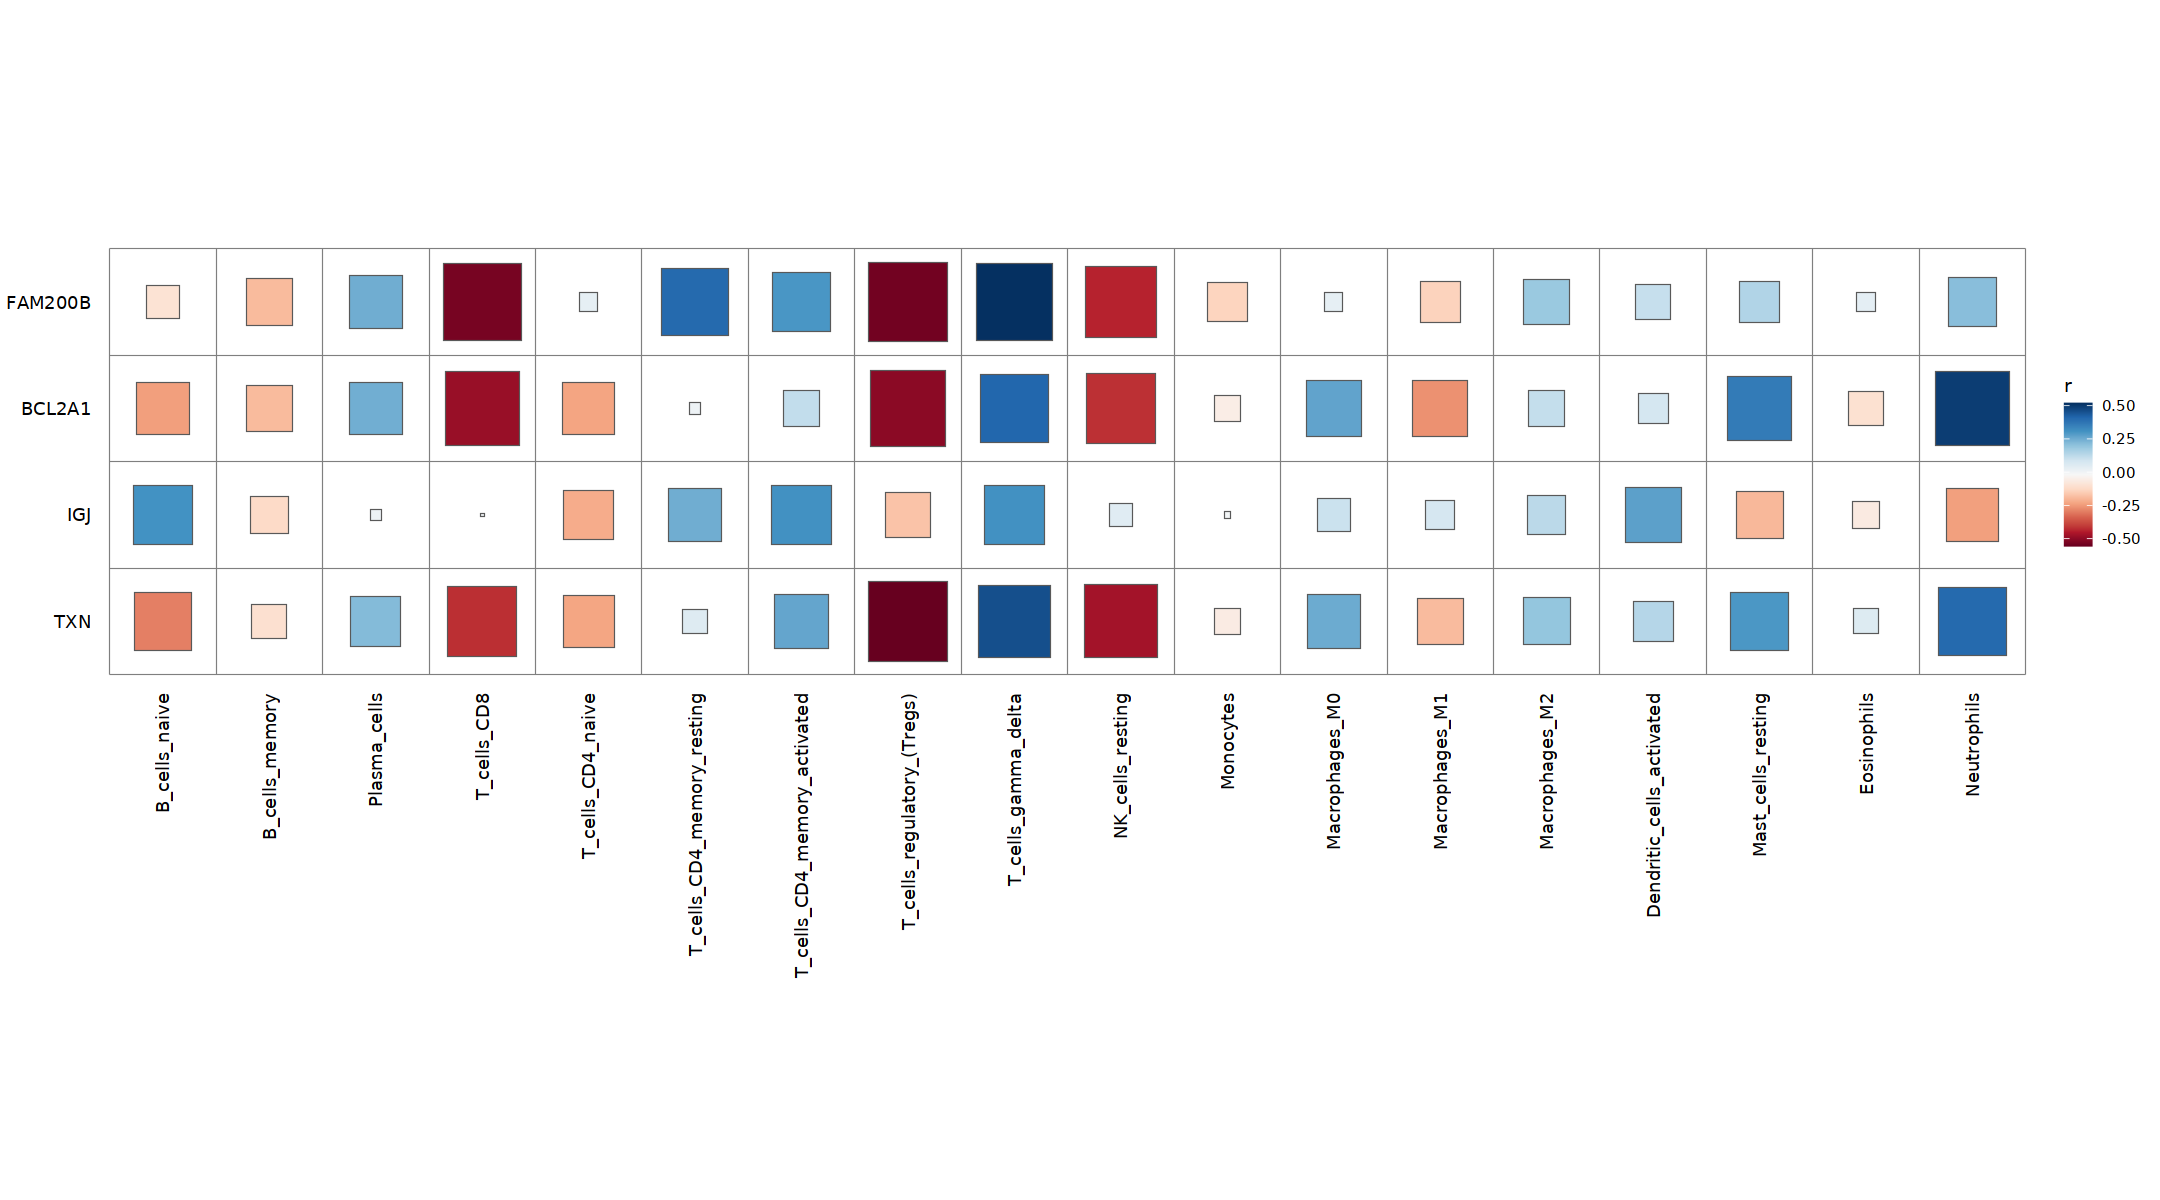

In [689]:
cor_res <- correlate(expr, im_ssgsea3,method = "spearman")
  
qcorrplot(cor_res) +
  geom_square() +
  scale_fill_gradientn(colours = RColorBrewer::brewer.pal(11, "RdBu"))

In [699]:
options(repr.plot.width = 12,repr.plot.height = 4)

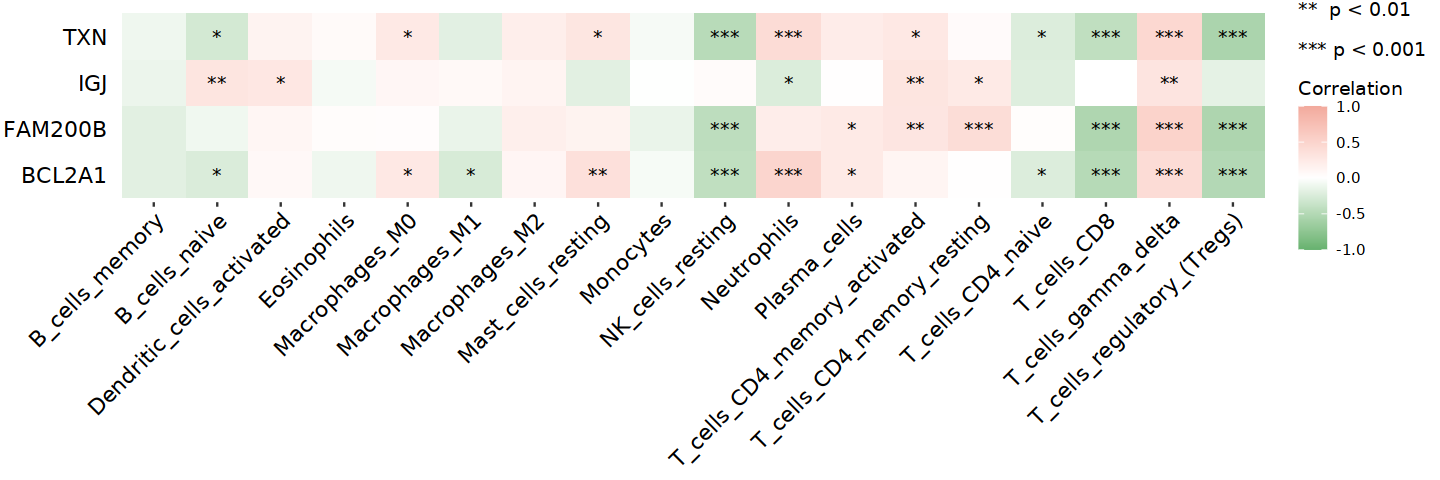

In [700]:
library(ggplot2)

ggplot(df_cor, aes(cell_type,gene))+
  geom_tile(aes(fill=correlation))+
  geom_text(aes(label=stars), color="black", size=4)+
  scale_fill_gradient2(low='#67B26F', high='#F2AA9D',mid = 'white',
                      limit=c(-1,1),name=paste0("*    p < 0.05","\n\n","**  p < 0.01","\n\n","*** p < 0.001","\n\n","Correlation"))+
  labs(x=NULL,y=NULL)+
  theme(axis.text.x = element_text(size=13,angle = 45,hjust = 1,color = "black"),
        axis.text.y = element_text(size=13,color = "black"),
        axis.ticks.y = element_blank(),
        panel.background=element_blank())

In [701]:
# 先整理下数据
df_r <- cor_res$r %>% 
  as.data.frame() %>% 
  rownames_to_column(var = "gene") %>% 
  pivot_longer(-1,names_to = "cell_type",values_to = "correlation")

df_p <- cor_res$p %>% 
  as.data.frame() %>% 
  rownames_to_column(var = "gene") %>% 
  pivot_longer(-1,names_to = "cell_type",values_to = "pvalue")

df_cor <- df_r %>% 
  left_join(df_p) %>% 
  mutate(stars = cut(pvalue,breaks = c(-Inf,0.05,0.01,0.001,Inf),right = F,labels = c("***","**","*"," ")))
## Joining with `by = join_by(gene, cell_type)`

head(df_cor)


Joining with `by = join_by(gene, cell_type)`


gene,cell_type,correlation,pvalue,stars
<chr>,<chr>,<dbl>,<dbl>,<fct>
FAM200B,B_cells_naive,-0.09691943,4.113758e-01,
FAM200B,B_cells_memory,-0.19133638,1.024601e-01,
FAM200B,Plasma_cells,0.24791984,3.319230e-02,*
FAM200B,T_cells_CD8,-0.53478367,9.188694e-07,***
FAM200B,T_cells_CD4_naive,0.02891354,8.068124e-01,
FAM200B,T_cells_CD4_memory_resting,0.40335129,3.661601e-04,***


In [702]:
for (i in colnames(expr)){

    # 以EGFR为例
df_egfr <- df_cor %>% 
  filter(gene==i) %>% dplyr::select(cell_type,correlation,pvalue)
colnames(df_egfr)[c(1,2)]= c('Cell','cor')
data = df_egfr
colnames(data)
p.col = c('gold','pink','orange','LimeGreen','darkgreen')
fcolor = function(x,p.col){
  color = ifelse(x>0.8,p.col[1],ifelse(x>0.6,p.col[2],ifelse(x>0.4,p.col[3],
                ifelse(x>0.2,p.col[4], p.col[5])
                )))
  return(color)
}

p.cex = seq(2.5, 5.5, length=5)
fcex = function(x){
  x=abs(x)
  cex = ifelse(x<0.1,p.cex[1],ifelse(x<0.2,p.cex[2],ifelse(x<0.3,p.cex[3],
              ifelse(x<0.4,p.cex[4],p.cex[5]))))
  return(cex)
}
points.color = fcolor(x=data$pvalue,p.col=p.col)
data$points.color = points.color
points.cex = fcex(x=data$cor)
data$points.cex = points.cex
data=data[order(data$cor),]

xlim = ceiling(max(abs(data$cor))*10)/10
pdf(file=paste0(i,".pdf"), width=9, height=7)
layout(mat=matrix(c(1,1,1,1,1,0,2,0,3,0),nc=2),width=c(8,2.2),heights=c(1,2,1,2,1))
par(bg="white",las=1,mar=c(5,18,2,4),cex.axis=1.5,cex.lab=2)
plot(1,type="n",xlim=c(-xlim,xlim),ylim=c(0.5,nrow(data)+0.5),xlab="Correlation Coefficient",ylab="",yaxt="n",yaxs="i",axes=F)
rect(par('usr')[1],par('usr')[3],par('usr')[2],par('usr')[4],col="#F5F5F5",border="#F5F5F5")
grid(ny=nrow(data),col="white",lty=1,lwd=2)
#绘制图形的线段
segments(x0=data$cor,y0=1:nrow(data),x1=0,y1=1:nrow(data),lwd=4)
#绘制图形的圆圈
points(x=data$cor,y = 1:nrow(data),col = data$points.color,pch=16,cex=data$points.cex)
#展示免疫细胞的名称
text(par('usr')[1],1:nrow(data),data$Cell,adj=1,xpd=T,cex=1.5)

pvalue.text=ifelse(data$pvalue<0.001,'<0.001',sprintf("%.03f",data$pvalue))
redcutoff_cor=0
redcutoff_pvalue=0.05
text(par('usr')[2],1:nrow(data),pvalue.text,adj=0,xpd=T,col=ifelse(abs(data$cor)>redcutoff_cor & data$pvalue<redcutoff_pvalue,"red","black"),cex=1.5)
axis(1,tick=F)
par(mar=c(0,4,3,4))
plot(1,type="n",axes=F,xlab="",ylab="")
legend("left",legend=c(0.1,0.2,0.3,0.4,0.5),col="black",pt.cex=p.cex,pch=16,bty="n",cex=2,title="abs(cor)")

#绘制圆圈颜色的图例
par(mar=c(0,6,4,6),cex.axis=1.5,cex.main=2)
barplot(rep(1,5),horiz=T,space=0,border=NA,col=p.col,xaxt="n",yaxt="n",xlab="",ylab="",main="pvalue")
axis(4,at=0:5,c(1,0.8,0.6,0.4,0.2,0),tick=F)
dev.off()
    
}

### 相关性分析热图

In [704]:
head(im_ssgsea3,2)

,B_cells_naive,B_cells_memory,Plasma_cells,T_cells_CD8,T_cells_CD4_naive,T_cells_CD4_memory_resting,T_cells_CD4_memory_activated,T_cells_regulatory_(Tregs),T_cells_gamma_delta,NK_cells_resting,Monocytes,Macrophages_M0,Macrophages_M1,Macrophages_M2,Dendritic_cells_activated,Mast_cells_resting,Eosinophils,Neutrophils
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C10,0.0184552748,0,0.000000000,0.1555477,0.1075937,0.07354913,0.02066837,0.01598648,0,0.1247511,0.13777233,0,0,0,0.006854585,0.003319929,0,0.3355013
C11,0.0002202792,0,0.003778107,0.1195569,0.0575484,0.01656198,0.04863193,0.00353335,0,0.1968771,0.08732389,0,0,0,0.000000000,0.001022185,0,0.4649459


In [705]:
cor<- cor(im_ssgsea3)

In [707]:
library(corrplot)

Warning message:
"package 'corrplot' was built under R version 4.2.3"
corrplot 0.92 loaded



In [727]:
col2 <- colorRampPalette(c("#233151","white" ,"#F12F07"),alpha = TRUE)

In [728]:
# corrplot(cor, order = "hclust", addgrid.col = "grey70",type = "upper",
# outline = "orange",col = col2(100),method = "square",diag = F)

In [729]:
res1 <- cor.mtest(im_ssgsea3, conf.level = .95)
res2 <- cor.mtest(im_ssgsea3, conf.level = .99)
p.mat = res1$p
p.mat[1:5,1:5]

,B_cells_naive,B_cells_memory,Plasma_cells,T_cells_CD8,T_cells_CD4_naive
B_cells_naive,0.0000000,0.3719584,0.4340397,0.3048935,0.3729857
B_cells_memory,0.3719584,0.0000000,0.3957350,0.6447815,0.1971029
Plasma_cells,0.4340397,0.3957350,0.0000000,0.4598475,0.2960889
T_cells_CD8,0.3048935,0.6447815,0.4598475,0.0000000,0.4803271
T_cells_CD4_naive,0.3729857,0.1971029,0.2960889,0.4803271,0.0000000


In [733]:
options(repr.plot.width = 12,repr.plot.height = 12)

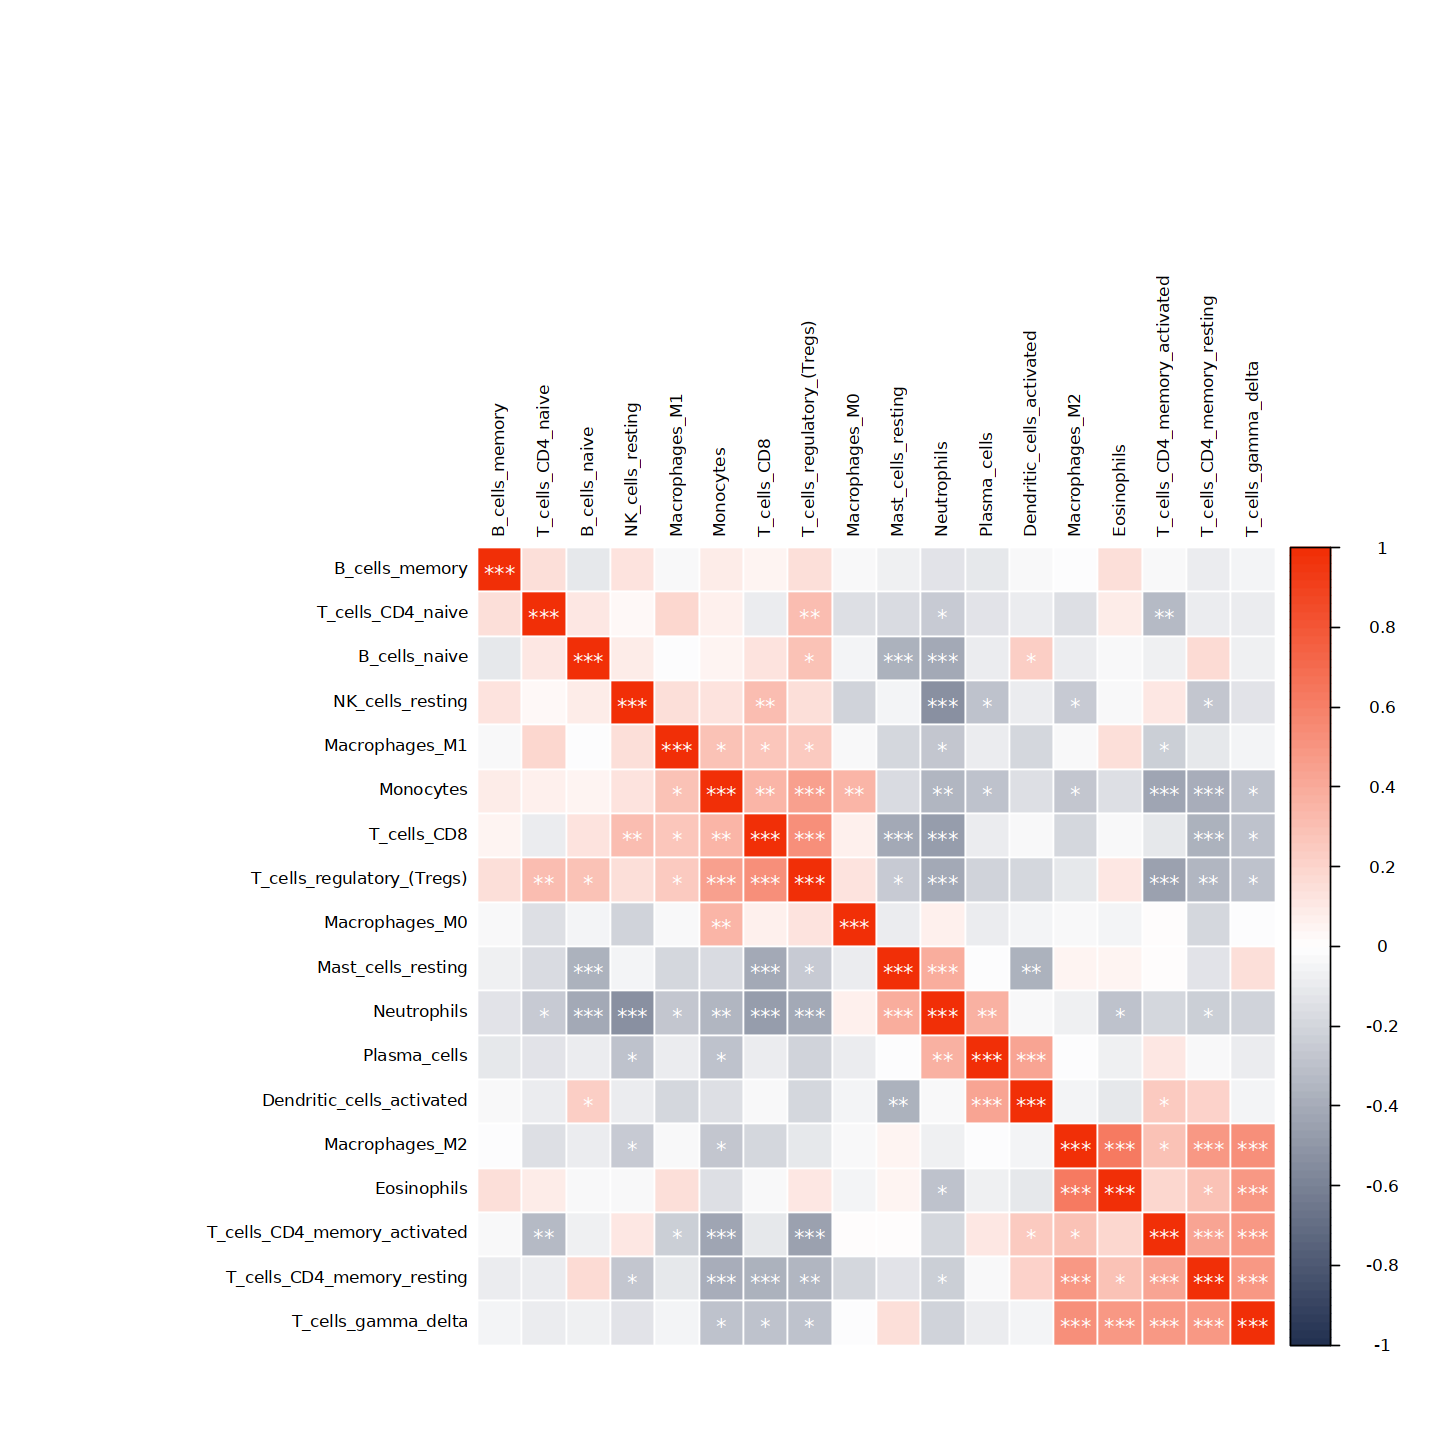

In [735]:
corrplot(cor, order = "hclust",col = col2(100),method = "color",
tl.col="black",tl.cex = 0.8,cl.pos = "r",cl.ratio = 0.2,
p.mat = res1$p, sig.level = c(.001, .01, .05),outline="white",
insig = "label_sig",pch.cex = 1, pch.col = "white")